In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='arial', style='normal',
                                         size=24, weight='normal', stretch='normal')

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/models")

from ternary_w_interactions import ternary_seg_profile
from scipy import constants

In [3]:
# check the input materials properties
ternary_seg_profile?


Init signature:
ternary_seg_profile(
    D0_C,
    Q_C,
    E_seg_C,
    D0_B,
    Q_B,
    E_seg_B,
    c0_C,
    c0_B,
    L_AB,
    L_AC,
    L_ABC,
    L_BC,
    T,
    d,
    nd,
    dt,
    nt,
)
Docstring:      <no docstring>
Init docstring:
A class to calculate the segregation profiles as a function of time for a ternary system. 
The ternary system is represented as A-B-C, where A is solvent, B is solute #1, and C is solute #2.

...

Attributes
----------
D0_B and D0_C: 1d array
    diffusion coefficients of solute B and C, have the same length as the number of layers $nd$
Q_B and Q_C : 1d array
    diffusion energy barriers of solute B and C, have the same length as the number of layers $nd$
E_seg_B and E_seg_C: 1d array
    segregation energies of solute B and C, have the same length as the number of layers $nd$
c0_C and c0_B: floats 
    initial solute concentrations between [0,1]
L_AB,L_AC,L_ABC, and L_BC: floats
    solute-solute interaction energies


T: float
    tempera

In [4]:
# Grid and time step parameters
data_Ni = pd.read_json('../data/Ni_221_flip_E.json')
# 
b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100

# segregation parameters
T = 873 #K

# C: Co

c0_C = 0.05

D0_C = 5e-6 #m^2/s
Q_C = 241 #kJ/mol

E_seg_list_C = np.zeros(nd)
E_seg_list_C[0] = data_Ni['Co'][0]
E_seg_list_C[1] = data_Ni['Co'][1]
E_seg_list_C[2] = data_Ni['Co'][2]
E_seg_list_C[3] = data_Ni['Co'][3]
E_seg_list_C[4] = data_Ni['Co'][4]


Q_list_C = np.random.normal(loc=Q_C,scale=5,size=nd)

# B: Cr
c0_B = 0.05

D0_B = 5e-4 #m^2/s
Q_B = 285 #kJ/mol

E_seg_list_B = np.zeros(nd)
E_seg_list_B[0] = data_Ni['Cr'][0]
E_seg_list_B[1] = data_Ni['Cr'][1]
E_seg_list_B[2] = data_Ni['Cr'][2]
E_seg_list_B[3] = data_Ni['Cr'][3]
E_seg_list_B[4] = data_Ni['Cr'][4]


Q_list_B = np.random.normal(loc=Q_B,scale=5,size=nd)


# time
dt = 1  # time step size /s
nt = 10000  # number of time steps


In [5]:
# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
L_AB = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_AC = (-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_ABC = (-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_BC = (+1500-9.592*T) * J2eV/NA


In [6]:
system = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)


In [7]:
system.tabulate_calc_res()

/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:261: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_B_layer_{i}'] = self.X_layers_B_vs_t.T[i]
/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:264: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_C_layer_{i}'] = self.X_layers_C_vs_t.T[i]


In [8]:
# take a look at the data
system.calc_data

,time(s),x_B_layer_0,x_B_layer_1,x_B_layer_2,x_B_layer_3,x_B_layer_4,x_B_layer_5,x_B_layer_6,x_B_layer_7,x_B_layer_8,...,x_C_layer_90,x_C_layer_91,x_C_layer_92,x_C_layer_93,x_C_layer_94,x_C_layer_95,x_C_layer_96,x_C_layer_97,x_C_layer_98,x_C_layer_99
0,0.0,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
1,1.0,0.049889,0.051327,0.048995,0.049840,0.049949,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
2,2.0,0.049918,0.052387,0.048165,0.049636,0.049898,0.049996,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
3,3.0,0.050037,0.053257,0.047472,0.049401,0.049844,0.049989,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
4,4.0,0.050221,0.053980,0.046890,0.049144,0.049787,0.049979,0.049999,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996.0,0.081202,0.081180,0.052506,0.049176,0.048459,0.048467,0.048475,0.048484,0.048494,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05
9997,9997.0,0.081202,0.081180,0.052506,0.049176,0.048459,0.048467,0.048475,0.048484,0.048495,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05
9998,9998.0,0.081202,0.081180,0.052507,0.049177,0.048460,0.048467,0.048475,0.048484,0.048495,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05
9999,9999.0,0.081202,0.081180,0.052507,0.049177,0.048460,0.048467,0.048475,0.048484,0.048495,...,0.049934,0.049941,0.049949,0.049956,0.049963,0.049971,0.049978,0.049985,0.049993,0.05


In [28]:
# generate TTS diagram
T_inc = 50
T_start = 750 #K
T_end = 1200 #K
T_list = np.arange(T_start,T_end,T_inc)
delta_t = {750:100,
           800:10,
           850:1,
           900:0.1,
           950:0.01,
           1000:0.002,
           1050:0.001,
           1100:0.0005,
           1150:0.0001}
# for each temperature, get the segregation as a function of time

Co_1_T_t_s = {}
Co_2_T_t_s = {}


Cr_1_T_t_s = {}
Cr_2_T_t_s = {}

# start for loop: 
for T in T_list:
    # time

    dt = delta_t[T]  # time step size /s
    nt = 50000  # number of time steps

    J2eV = 8.617333262145e-5/1.380649e-23
    NA = constants.Avogadro

    # data from https://doi.org/10.1016/j.calphad.2015.12.007
    # Cr in Ni # FCC
    L_AB = (+8030-12.8801*T) * J2eV /NA

    # Co in Ni # FCC
    L_AC = (-800+1.2629*T) * J2eV /NA

    # Co-Cr in Ni # FCC
    L_ABC = (-40710+13.5334*T) * J2eV /NA
    #a_BC = -6250 * J2eV /NA

    # Co-Cr
    L_BC = (+1500-9.592*T) * J2eV/NA
    #L_BC = 0

    system = ternary_seg_profile(D0_C,Q_C, # 1d array, same length as nd
           E_seg_list_C,# 1d array, same length as nd
           D0_B,Q_B, # 1d array, same length as nd
           E_seg_list_B,# 1d array, same length as nd
           c0_C,c0_B,
           L_AB,L_AC,L_ABC,L_BC,
           T,
           d,
           nd, 
           dt,
           nt)
    
    system.tabulate_calc_res()
    
    
    Co_1_T_t_s[str(T)] = {
        't(s)':system.t,
        'seg':system.X_layers_C_vs_t.T[0]
                            }
    
    Co_2_T_t_s[str(T)] = {
        't(s)':system.t,
        'seg':system.X_layers_C_vs_t.T[1]
                            }
    
    Cr_1_T_t_s[str(T)] = {
        't(s)':system.t,
        'seg':system.X_layers_B_vs_t.T[0]
                            }
    
    Cr_2_T_t_s[str(T)] = {
        't(s)':system.t,
        'seg':system.X_layers_B_vs_t.T[1]
                            }
    print('Done ', T)

/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:261: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_B_layer_{i}'] = self.X_layers_B_vs_t.T[i]
/Users/Dongsheng/project/suzuki_kinetics/models/ternary_w_interactions.py:264: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.calc_data[f'x_C_layer_{i}'] = self.X_layers_C_vs_t.T[i]


Done  750
Done  800
Done  850
Done  900
Done  950
Done  1000
Done  1050
Done  1100
Done  1150


In [29]:
system = []

In [30]:
from scipy.interpolate import interp1d

In [31]:
all_data_T_t_s = pd.DataFrame()
for T in T_list:
    all_data_T_t_s[f'Co_1_{T}_t'] = Co_1_T_t_s[str(T)]['t(s)']
    all_data_T_t_s[f'Co_1_{T}_s'] = Co_1_T_t_s[str(T)]['seg']
    
    all_data_T_t_s[f'Co_2_{T}_t'] = Co_2_T_t_s[str(T)]['t(s)']
    all_data_T_t_s[f'Co_2_{T}_s'] = Co_2_T_t_s[str(T)]['seg']
    
    all_data_T_t_s[f'Cr_1_{T}_t'] = Cr_1_T_t_s[str(T)]['t(s)']
    all_data_T_t_s[f'Cr_1_{T}_s'] = Cr_1_T_t_s[str(T)]['seg']
    
    all_data_T_t_s[f'Cr_2_{T}_t'] = Cr_2_T_t_s[str(T)]['t(s)']
    all_data_T_t_s[f'Cr_2_{T}_s'] = Cr_2_T_t_s[str(T)]['seg']

In [36]:
# interpolate a time-segregation function to extract the contour line

Co_1_seg_1at_T_t = []
Co_1_seg_2at_T_t = []


Cr_1_seg_1at_T_t = []
Cr_1_seg_2at_T_t = []


for T in T_list:
    Co_1_func = interp1d(all_data_T_t_s[f'Co_1_{T}_s']-all_data_T_t_s[f'Co_1_{T}_s'][0],all_data_T_t_s[f'Co_1_{T}_t'])
    Co_1_seg_1at_T_t.append([T,Co_1_func(0.01)])
    Co_1_seg_2at_T_t.append([T,Co_1_func(0.0198)])
    
    Cr_1_func = interp1d(all_data_T_t_s[f'Cr_1_{T}_s']-all_data_T_t_s[f'Cr_1_{T}_s'][0],all_data_T_t_s[f'Cr_1_{T}_t'])
    Cr_1_seg_1at_T_t.append([T,Cr_1_func(0.01)])
    Cr_1_seg_2at_T_t.append([T,Cr_1_func(0.02)])
    
Co_1_seg_1at_T_t = np.array(Co_1_seg_1at_T_t)
Co_1_seg_2at_T_t = np.array(Co_1_seg_2at_T_t)


Cr_1_seg_1at_T_t = np.array(Cr_1_seg_1at_T_t)
Cr_1_seg_2at_T_t = np.array(Cr_1_seg_2at_T_t)

<Figure size 432x288 with 0 Axes>

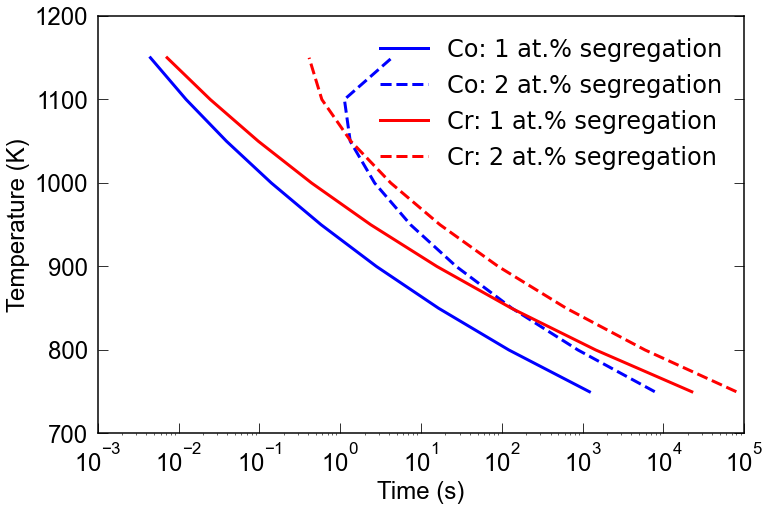

In [38]:
plt.draw()
f = plt.figure(figsize=(12*0.9,8*0.9))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(1e-3,1e5)
ax1.set_ylim(700,1200)
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00','k']
                  
markers = ['o','<','s','d','x','>','v']

ax1.plot(Co_1_seg_1at_T_t.T[1],Co_1_seg_1at_T_t.T[0],
         color='b',mec='b',mfc='None',ls='-',lw=3,label='Co: 1 at.% segregation')

ax1.plot(Co_1_seg_2at_T_t.T[1],Co_1_seg_2at_T_t.T[0],
         color='b',mec='b',mfc='None',ls='--',lw=3,label='Co: 2 at.% segregation')


ax1.plot(Cr_1_seg_1at_T_t.T[1],Cr_1_seg_1at_T_t.T[0],
         color='r',mec='r',mfc='None',ls='-',lw=3,label='Cr: 1 at.% segregation')

ax1.plot(Cr_1_seg_2at_T_t.T[1],Cr_1_seg_2at_T_t.T[0],
         color='r',mec='r',mfc='None',ls='--',lw=3,label='Cr: 2 at.% segregation')



ax1.set_xscale('log')


ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_ylabel('Temperature (K)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,loc='upper right')
ax1.set_xlabel('Time (s)',fontproperties=ticks_font)
plt.tight_layout()

f.savefig('./plots/NiCoCr_ISF_TTS.pdf')